In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
# Generate some random data
np.random.seed(2)

n = 10
x = np.linspace(-.5, 1.2, n)

X = pd.DataFrame({"x": x, "x^2": x**2}) #modified: added x^2, originally did not have this
y = -x**2 + x + 1 + (.1 * np.random.randn(n))

In [27]:
X

,x,x^2
0,-0.500000,0.250000
1,-0.311111,0.096790
2,-0.122222,0.014938
3,0.066667,0.004444
4,0.255556,0.065309
5,0.444444,0.197531
6,0.633333,0.401111
7,0.822222,0.676049
8,1.011111,1.022346
9,1.200000,1.440000


ValueError: x and y must be the same size

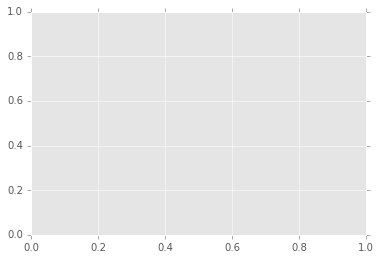

In [28]:
plt.style.use("ggplot")
plt.scatter(X, y, c="black")

In [4]:
#you fit a line thru trainign data and use equation of line to predict observations.

#Is there a way to fit a parabola using linear regression? Yes

#Even with one var, we can create a new variable called x^3...


#so far we have been assuming that x is a quantitative .,.......

In [5]:
#dealing with categorical x var's: expand into multiple binary 1's and 0's variables

In [6]:
#Each column of vector represents if a row of characteristic is true

In [7]:
#================================================================Assessing Model fit

In [8]:
#How do we know how well our model fits the data

In [9]:
#we can calc mean squared training error (sum over n)
#Error: (distance between line and actual observation)^2

#the higher degree polynomial, the lower the error!


In [10]:
#-----------------------------------------------
#However, you wouldn't want to use such an accurate model, because we're trying to FIT THE MEAN.
#THUS, WE DON'T WANT TO FIT IT PERFECTLY.

#can't extrapolate from exact fit either.

#we want to be able to predict.

#ADDING MORE VARS can only decrease training error because of more flexibility.,
#BUT MAY INCREASE TEST ERROR

#we ULTIMATELY care about TEST ERROR because we want to know how well our model does for FUTURE data points

#test error = generalization error

#===> Thus, we overfitted the training data because we only considered training error at expensive of test error.
#---------------------------------------------------

In [11]:
#How do we estimate test error?

#A: Hold out some training data.

#We fit a polynomial of degree p on actual observations without held out data and if test error is big, then it's bad

#GRAPHS:
# AS p INCREASES, training error goes DOWN
# AS P INCREASES UNTIL SOME POINT, error goes down. HOWEVER, as p is gets too big, test error will START increasing

In [12]:
#-==========================================================CROSS VALIDATION

In [13]:
#one of the MOST IMPORTANT techniques in machine learning.

In [14]:
#issue: estimating test error with only a few observation

In [15]:
# 1] divide data into k folds
#2] one at a time, ea fold is held out...
    # hold out fold 1, eval test error for rest of data
#3] in end we get k estimate sof test error.

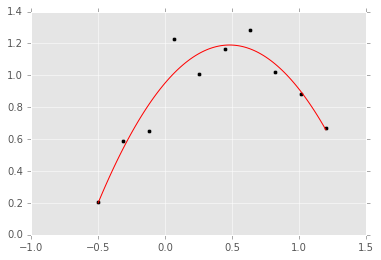

In [21]:
#cross validation in scikit learn

 #cv is the number of folds

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

model = LinearRegression()
model.fit(X,y)

plt.scatter(X['x'],y, c= 'black') #brackets indicate a series

x_new = np.linspace(-0.5, 1.2, 100) #100 equally spaced from ... to ...
y_new = model.intercept_ + model.coef_[0] * x_new + model.coef_[1] * x_new ** 2

plt.plot(x_new, y_new, "r-")

In [25]:
from sklearn.cross_validation import cross_val_score
-cross_val_score(model, X,y,cv=3,scoring = "mean_squared_error")
#without negative, you get scores, the higher the score the better
# for errors, the lower, the better
#gets TEST ERRORS; SEE X^3 model for proof that it doesn't always go down

array([ 0.24256726,  0.01216476,  0.05783141])

In [26]:
np.mean(-cross_val_score(model, X,y,cv=3,scoring = "mean_squared_error"))
#mean of mean sq errors

0.10418781351859718

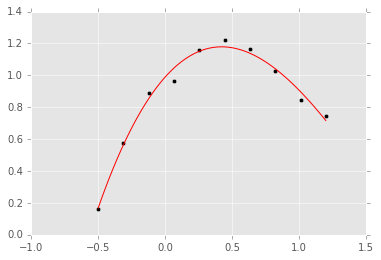

In [30]:
#Exercise: now try to fit different models or polynomials

n = 10
x = np.linspace(-.5, 1.2, n)

X = pd.DataFrame({"x": x, "x^2": x**2, "x^3": x ** 3})
y = -x**2 + x + 1 + (.1 * np.random.randn(n))

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

model = LinearRegression()
model.fit(X,y)

plt.scatter(X['x'],y, c= 'black') #brackets indicate a series

x_new = np.linspace(-0.5, 1.2, 100) #100 equally spaced from ... to ...
y_new = model.intercept_ + model.coef_[0] * x_new + model.coef_[1] * x_new ** 2 + model.coef_[2] * x_new ** 3

plt.plot(x_new, y_new, "r-")

In [31]:
from sklearn.cross_validation import cross_val_score
-cross_val_score(model, X,y,cv=3,scoring = "mean_squared_error")
#without negative, you get scores, the higher the score the better
# for errors, the lower, the better
#gets test errors

array([ 1.43499249,  0.00675411,  0.05173451])

In [32]:
np.mean(-cross_val_score(model, X,y,cv=3,scoring = "mean_squared_error"))
#mean of test errors

0.49782703449558613

In [43]:
#let's try: NICER SOLUTION

X = pd.DataFrame()

test_errors = []
train_errors = []

for p in range(1,5): #don't want intercept, so start from 1
    X["x^%d" % p] = x ** p
    model.fit(X,y) #fit model again
#     print(model.coef_) #what the coeffs are
    y_hat = model.predict(X)
    train_errors.append(np.mean((y-y_hat) ** 2))
    #get test error
    test_errors.append(np.mean(-cross_val_score(model,X,y,cv = 3, scoring ="mean_squared_error")))

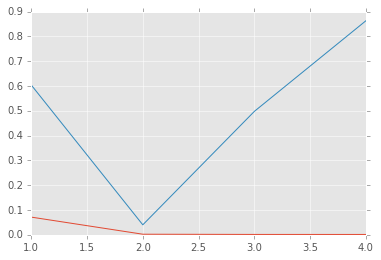

In [45]:
plt.plot(range(1,5), train_errors)
plt.plot(range(1,5), test_errors)

In [46]:
#Sweetspot is when degree is 2 (x^2)